# Estatística Prática para Cientistas de Dados
## Peter Bruce & Andrew Bruce

### Capítulo 1: Análise Exploratória de Dados


In [1]:
# Importações

import numpy as np
import pandas as pd
from scipy.stats import trim_mean, median_abs_deviation, iqr
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Conjunto de Dados

PATH = '../database/'

STATE = PATH + 'state.csv'
DFW_AIRLINE = PATH + 'dfw_airline.csv'
SP500_SYM = PATH + 'sp500_sectors.csv'
SP500_PX = PATH + 'sp500_data.csv.gz'
KC_TAX = PATH + 'kc_tax.csv.gz'
LC_LOAN = PATH + 'lc_loans.csv'
AIRLINE_STATS = PATH + 'airline_stats.csv'


#### Estimativas de Localização


In [3]:
# Funções Auxiliares

def weighted_median(values, weights) -> float:
    indeces = np.argsort(values)
    values = np.sort(values)
    weights = weights[indeces]
    
    cumsum_weights = np.cumsum(weights)
    central_value = max(cumsum_weights)/2
    
    if np.any(cumsum_weights == central_value):
        median = values[cumsum_weights == central_value]
    else:
        lower_value_index = sum(cumsum_weights < central_value) - 1
        top_value_index = lower_value_index + 1
        
        median = (values[lower_value_index] + values[top_value_index])/2
    
    return median

def mean_abs_deviation(values) -> float:
    mean = np.mean(values)
    deviations = values - mean
    abs_deviations = np.absolute(deviations)
    
    result = np.mean(abs_deviations)
    
    return result


In [4]:
# Exemplo 1

# Média

conjunto_de_numeros = np.array([3, 5, 1, 2])
media = np.mean(conjunto_de_numeros)
print(f'A média dos números {conjunto_de_numeros} é {media}.')


A média dos números [3 5 1 2] é 2.75.


In [5]:
# Exemplo 2

# Conjunto de Dados

state = pd.read_csv(STATE)
display(state.head(8))

print('\n- Medidas de Localidade para a População\n')
print(f'A média é {round(state.Population.mean())}')
print(f'A média aparada (trim mean) é {round(trim_mean(state.Population, proportiontocut=0.1))}')
print(f'A mediana é {round(state.Population.median())}')

print('\n- Medidas de Localidade para a Taxa Média de Homicídios\n')
print(f"A média ponderada é {np.average(state['Murder.Rate'], weights=state.Population)}")
print(f"A mediana ponderada é {weighted_median(state['Murder.Rate'], state.Population)}")


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE



- Medidas de Localidade para a População

A média é 6162876
A média aparada (trim mean) é 4783697
A mediana é 4436370

- Medidas de Localidade para a Taxa Média de Homicídios

A média ponderada é 4.445833981123393
A mediana ponderada é 4.4


#### Estimativas de Variabilidade

In [6]:
# Exemplo 3

conjunto_de_dados = np.array([1, 4, 4])
media = round(np.mean(conjunto_de_dados))
desvios = conjunto_de_dados - media

print(f'O conjunto de dados é {conjunto_de_dados}')
print(f'Os desvios da média do conjunto de dados são {desvios}')
print(f'Os valores absolutos dos desvios são {np.absolute(desvios)}')
print(f'O desvio absoluto médio (ou norma de Manhattan) é {round(mean_abs_deviation(conjunto_de_dados), 2)}')


O conjunto de dados é [1 4 4]
Os desvios da média do conjunto de dados são [-2  1  1]
Os valores absolutos dos desvios são [2 1 1]
O desvio absoluto médio (ou norma de Manhattan) é 1.33


In [7]:
# Exemplo 4

display(state.head())

print(f'\n- Medidas de Dispersão para a População\n')
print(f'O desvio padrão é {round(state.Population.std())}')
print(f'A amplitude interquartis (IQR) é {round(iqr(state.Population))}')
print(f'O desvio absoluto mediano é {round(robust.scale.mad(state.Population))}')


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA



- Medidas de Dispersão para a População

O desvio padrão é 6848235
A amplitude interquartis (IQR) é 4847308
O desvio absoluto mediano é 3849876


#### Explorando a Distribuição de Dados

Os quantis da Taxa de Homicídio são:

[[0.05  0.25  0.5   0.75  0.95 ]
 [1.6   2.425 4.    5.55  6.51 ]]



0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

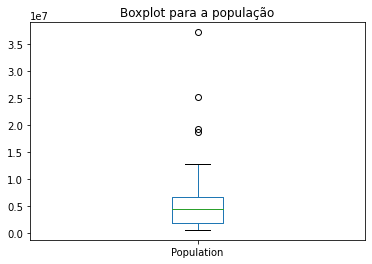

In [8]:
# Exemplo 5

references = np.array([0.05, 0.25, 0.5, 0.75, 0.95])
quantis = np.quantile(state['Murder.Rate'], references)

print(f'Os quantis da Taxa de Homicídio são:\n\n{np.array([references, quantis])}\n')
display(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

plt.figure()
state.boxplot(column='Population', grid=False);
plt.title('Boxplot para a população');


Tabela de Frequência da População:


(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

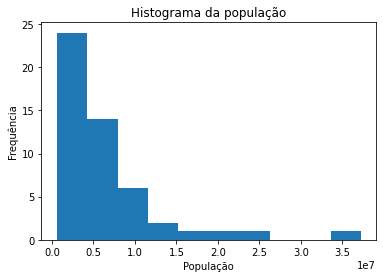

In [9]:
# Exemplo 6

print('Tabela de Frequência da População:')
binnedPopulation = pd.cut(state['Population'], 10)
display(binnedPopulation.value_counts())

plt.figure()
state.Population.hist()
plt.title('Histograma da população')
plt.xlabel('População')
plt.ylabel('Frequência')
plt.grid()


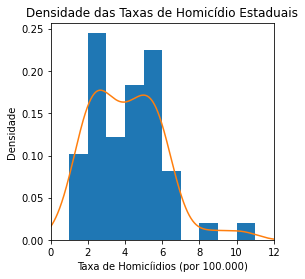

In [10]:
# Exemplo 7

plt.figure()
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax);
plt.title('Densidade das taxas de homicídio estaduais');
ax.set_xlabel('Taxa de homicíidios (por 100.000)');
ax.set_ylabel('Densidade');


#### Explorando Dados Binários e Categóricos

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


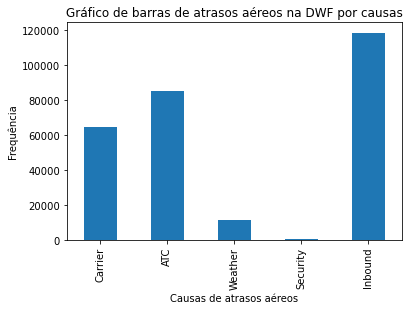

In [24]:
# Exemplo 8

dfw = pd.read_csv(DFW_AIRLINE)
display(dfw)

dfw.transpose().plot.bar(legend=False);
plt.title('Gráfico de barras de atrasos aéreos na DWF por causas')
plt.xlabel('Causas de atrasos aéreos');
plt.ylabel('Frequência');


In [12]:
# Exemplo 9

"""
Um vendedor de uma nova tecnologia de nuvem, por exemplo, oferece dois níveis de serviços, um que custa R$ 300/mês e outro que
custa R$ 50/mês.

O vendedor oferecee webinars gratuitos para gerar leads, e a empresa percebe que 5% dos participantes assinarão o serviço de
R$ 300, 15% o de R$ 50, e 80% não assinarão.
"""

EV = 0.05*300 + 0.15*50 + 0.8*0
print(f'O valor esperado de um participante de webinar é R$ {EV} por mês')

O valor esperado de um participante de webinar é R$ 22.5 por mês


#### *Observações*

Utilização das medidas de localização:

- Média: Utilizada para dados numéricos sem outliers;
- Mediana: Utilizada para dados numéricos com outliers;
- Moda: Utilizada para dados categóricos.


#### Correlação

In [13]:
# Leitura dos Dados

sp500_sym = pd.read_csv(SP500_SYM)
sp500_px = pd.read_csv(SP500_PX, index_col=0)

display(sp500_sym.head())
display(sp500_sym.info())
display(sp500_sym.describe())

display(sp500_px.head())
display(sp500_px.info())
display(sp500_px.describe())


,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sector        517 non-null    object
 1   sector_label  517 non-null    object
 2   sub_sector    517 non-null    object
 3   symbol        517 non-null    object
dtypes: object(4)
memory usage: 16.3+ KB


None

,sector,sector_label,sub_sector,symbol
count,517,517,517,517
unique,11,11,135,517
top,financials,Financials,industrial_conglomerates,ADS
freq,88,88,24,1


,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 5647 entries, 1993-01-29 to 2015-07-01
Columns: 517 entries, ADS to HSIC
dtypes: float64(517)
memory usage: 22.3+ MB


None

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
count,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,...,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000,5647.000000
mean,0.041273,0.003379,0.003065,-0.032918,0.003007,0.013891,0.000586,0.050163,-0.000881,-0.000694,...,0.018307,0.005434,-0.012175,-0.001181,0.012839,0.005226,-0.003724,0.015399,0.011133,0.022780
std,1.291017,0.580829,0.359792,1.076244,0.316781,0.875912,0.743526,1.202898,0.346036,0.668376,...,0.946297,1.161781,1.024801,0.040555,2.084182,0.558498,0.478073,2.376597,1.204722,0.621497
min,-11.240005,-6.612527,-2.076718,-13.500000,-2.785000,-19.859698,-8.372804,-8.993271,-3.263346,-6.189851,...,-10.500000,-15.060013,-7.315023,-1.710001,-36.470001,-6.819999,-5.300798,-20.490021,-9.187500,-4.690003
25%,-0.130001,-0.217653,-0.143606,-0.189999,-0.058120,-0.346870,-0.134952,-0.475817,-0.119237,-0.239486,...,-0.290001,-0.122500,-0.351788,0.000000,-0.410000,-0.092500,-0.077838,-0.379999,-0.389999,-0.250000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023545,0.000000,-0.007096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.200003,0.225176,0.146588,0.150000,0.067815,0.372219,0.154232,0.568174,0.128171,0.227150,...,0.320000,0.117500,0.370305,0.000000,0.479999,0.098750,0.084384,0.375000,0.375000,0.305000
max,20.039993,4.752754,3.490654,18.781250,1.994999,8.048167,13.974327,8.802359,3.475058,9.620642,...,6.879997,15.470001,7.519540,0.550004,18.820007,4.459999,4.892281,30.710022,11.937500,7.349999


In [14]:
# Exemplo 10

# Símbolos de Telecomunicação
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filtro de Dados
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

display(telecom.head())
display(telecom.corr())


,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


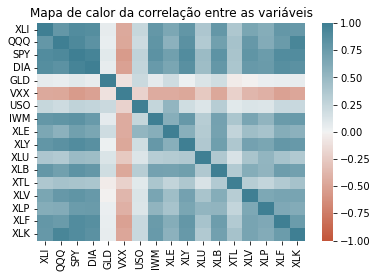

In [15]:
# Exemplo 11

etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf'].symbol]

display(etfs.head())
display(etfs.corr())

sns.heatmap(etfs.corr(),
            vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True));
plt.title('Mapa de calor da correlação entre as variáveis');


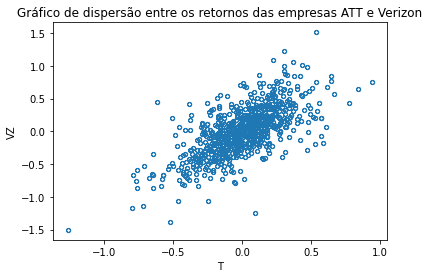

In [16]:
# Exemplo 12

telecom.plot.scatter(x='T', y='VZ', marker='$\u25EF$');
plt.title('Gráfico de dispersão entre os retornos das empresas ATT e Verizon');


#### Explorando Duas ou Mais Variáveis

In [17]:
# Exemplo 13

kc_tax = pd.read_csv(KC_TAX)
display(kc_tax.head())

kc_tax0 = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) &
                (kc_tax['SqFtTotLiving'] > 100) &
                (kc_tax['SqFtTotLiving'] < 3500)]
display(kc_tax0.head())

print(f'\nO tamanho do DataFrame é {kc_tax0.shape}')


,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0



O tamanho do DataFrame é (432693, 3)


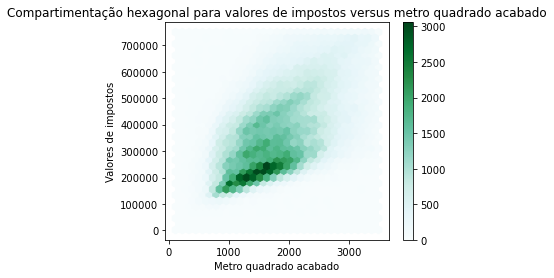

In [18]:
# Exemplo 14

kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4));
plt.title('Compartimentação hexagonal para valores de impostos versus metro quadrado acabado');
plt.xlabel('Metro quadrado acabado');
plt.ylabel('Valores de impostos');


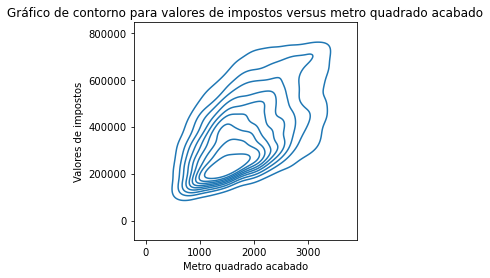

In [25]:
# Exemplo 15

fig, ax = plt.subplots(figsize=(4, 4));
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue');
plt.title('Gráfico de contorno para valores de impostos versus metro quadrado acabado')
plt.xlabel('Metro quadrado acabado');
plt.ylabel('Valores de impostos');


In [20]:
# Exemplo 16

lc_loan = pd.read_csv(LC_LOAN)
display(lc_loan.head())

print('\nTabela de contigência para notas e status de empréstimos:')
crosstable = lc_loan.pivot_table(index='grade',
                                 columns='status',
                                 aggfunc=lambda x: len(x),
                                 margins=True)
display(crosstable)


,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B



Tabela de contigência para notas e status de empréstimos:


status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


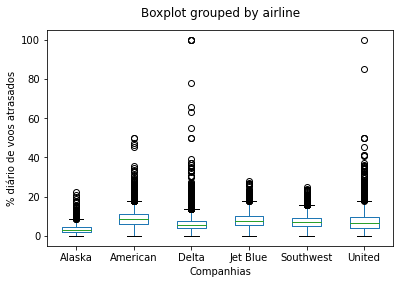

In [33]:
# Exemplo 17

airline_stats = pd.read_csv(AIRLINE_STATS)
display(airline_stats.head())

airline_stats.boxplot(by='airline', column='pct_carrier_delay');
plt.title('')
plt.xlabel('Companhias')
plt.ylabel('% diário de voos atrasados')
plt.grid()


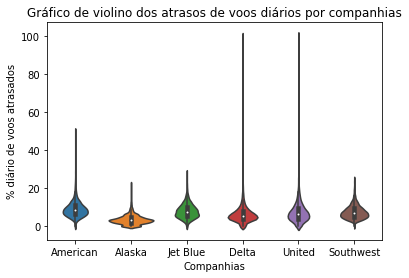

In [32]:
# Exemplo 18

sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay');
plt.title('Gráfico de violino dos atrasos de voos diários por companhias');
plt.xlabel('Companhias');
plt.ylabel('% diário de voos atrasados');


,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


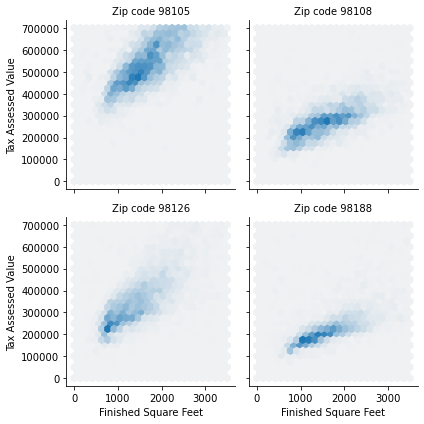

In [23]:
# Exemplo 19

zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
display(kc_tax_zip.head())

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()